In [38]:
%reset -f

In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import json

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedKFold
from math import sqrt
from scipy import stats
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, learning_curve
#import ifsg
import glob, os #I ADDED
from sklearn.svm import SVR, LinearSVR #I ADDED
from sklearn.tree import DecisionTreeRegressor #I ADDED
import pickle
import re
import random
import os
import warnings
import seaborn as sns
import gc
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

#ifsg.__version__

In [40]:
x=os.path.splitext(os.path.split(os.path.splitext(os.path.split(os.getcwd())[0])[0])[0])
path_dataset = str(x[0])+os.sep+"Data"+os.sep+"Datasets"
path_save    = str(x[0])+os.sep+"Data"+os.sep+"Modeling"+os.sep+time.strftime("%d.%m.%y")#+os.sep+"accuracy_only"
if not os.path.exists(path_save):
    os.makedirs(path_save)
    print("creating directory...")
else:
    print("directory exists")

print(path_save)
print(path_dataset)

directory exists
C:\Users\VORTEX\Desktop\Data\Modeling\29.01.19
C:\Users\VORTEX\Desktop\Data\Datasets


In [41]:
file = path_dataset+os.sep+"verbal"+os.sep+"vrbl_2d_lod.json"
#df = pd.read_csv(file)
with open(file) as train_file:
    dict_train = json.load(train_file)

# converting json dataset from dictionary to dataframe
df = pd.DataFrame.from_dict(dict_train)
df = df[df.columns[df.columns.str.startswith('v2d.r_sAccuracy.')]]
#df.index.drop(['DEMO'])
print(df.shape)

(26, 16)


In [43]:
# sort columns in alphabetical order
a = [];
for col in sorted(df.columns):
    a.append(col)
    
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

a.sort(key=natural_keys)

df=df[a]


#df=df[np.isfinite(df['v2d.r_sAccuracy.0'])]

#df=df[np.logical_not(df.index.str.startswith('W'))]
df#.head()

,v2d.r_sAccuracy.0,v2d.r_sAccuracy.1,v2d.r_sAccuracy.2,v2d.r_sAccuracy.3,v2d.r_sAccuracy.4,v2d.r_sAccuracy.5,v2d.r_sAccuracy.6,v2d.r_sAccuracy.7,v2d.r_sAccuracy.8,v2d.r_sAccuracy.9,v2d.r_sAccuracy.10,v2d.r_sAccuracy.11,v2d.r_sAccuracy.12,v2d.r_sAccuracy.13,v2d.r_sAccuracy.14,v2d.r_sAccuracy.15
W1852141,0.0,1.0,1.0,1.0,0.0,0.5,0.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
W1852142,0.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W1852143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W1852144,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
W1852145,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
W1852146,0.0,1.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
W1852147,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W1852148,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
W1852149,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
W1852151,0.0,1.0,1.0,1.0,0.0,0.5,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(26, 16)

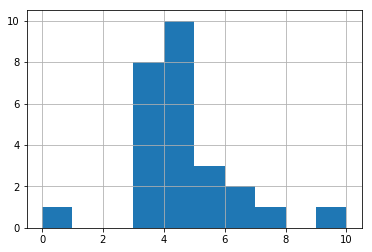

In [44]:
df.sum(axis=1).hist()
df.shape

In [45]:
# percent correct per question
df.sum(axis=0)/df.shape[0]*100

v2d.r_sAccuracy.0     19.230769
v2d.r_sAccuracy.1     76.923077
v2d.r_sAccuracy.2     92.307692
v2d.r_sAccuracy.3     84.615385
v2d.r_sAccuracy.4     17.307692
v2d.r_sAccuracy.5     28.846154
v2d.r_sAccuracy.6     28.846154
v2d.r_sAccuracy.7      5.769231
v2d.r_sAccuracy.8     23.076923
v2d.r_sAccuracy.9     38.461538
v2d.r_sAccuracy.10     0.000000
v2d.r_sAccuracy.11     0.000000
v2d.r_sAccuracy.12     0.000000
v2d.r_sAccuracy.13     0.000000
v2d.r_sAccuracy.14     0.000000
v2d.r_sAccuracy.15    11.538462
dtype: float64

In [46]:
# percent unsolved per question
df.isna().sum(axis=0)/df.shape[0]*100

v2d.r_sAccuracy.0      0.000000
v2d.r_sAccuracy.1      0.000000
v2d.r_sAccuracy.2      0.000000
v2d.r_sAccuracy.3      0.000000
v2d.r_sAccuracy.4      0.000000
v2d.r_sAccuracy.5      0.000000
v2d.r_sAccuracy.6      0.000000
v2d.r_sAccuracy.7      0.000000
v2d.r_sAccuracy.8      0.000000
v2d.r_sAccuracy.9      0.000000
v2d.r_sAccuracy.10    53.846154
v2d.r_sAccuracy.11    53.846154
v2d.r_sAccuracy.12    53.846154
v2d.r_sAccuracy.13    53.846154
v2d.r_sAccuracy.14    53.846154
v2d.r_sAccuracy.15    53.846154
dtype: float64

In [37]:
df.to_csv(path_dataset+os.sep+"verbal"+os.sep+'vrbl_2d_lod.csv')